In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import torch
import matplotlib.pyplot as plt

/home/jungredda/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


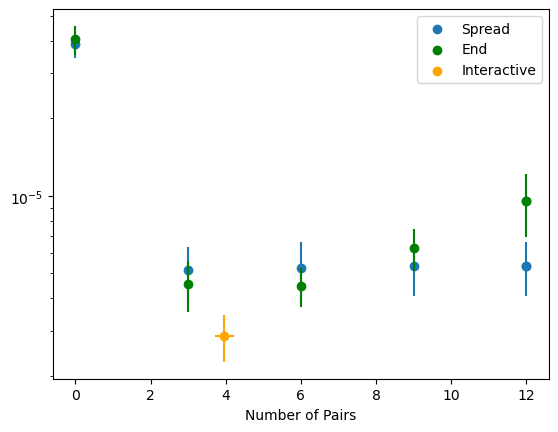

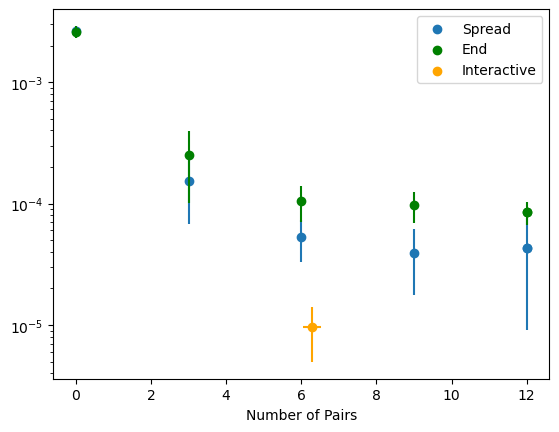

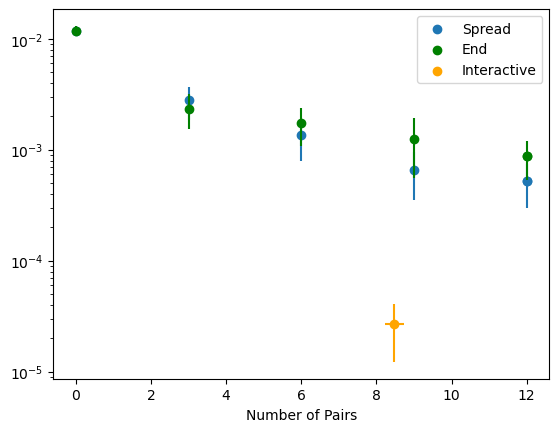

In [9]:
distance = [0.01, 0.1, 0.3]
pairs = [0, 3, 6, 9, 12]
seeds = range(200)
for d in distance:
    for p in pairs:
        results = []
        for s in seeds:
            folder_name = "results/Spherical_{}_{}_pair_experiments".format(d, p)
            path = folder_name + "/Spherical/VoISim/Tche/{}.pkl".format(s)
            if os.path.exists(path):
                df = pd.read_pickle(path)
                results.append(df["OC_GP"][-1][1])
#                 print("blue",df["OC_GP"])
                
        mean_results = np.mean(results)
        MSE_results = 1.96*np.std(results)/np.sqrt(len(results))
        plt.scatter(p, mean_results, color= 'C0')
        plt.errorbar(p, mean_results, yerr=MSE_results, linestyle='', color= 'C0')
    plt.scatter(p, mean_results, color= 'C0', label="Spread")
    for p in pairs:
        results = []
        for s in seeds:
            folder_name = "results/base_Spherical_{}_{}_pair_experiments".format(d, p)
            path = folder_name + "/Spherical/VoISim/Tche/{}.pkl".format(s)
            if os.path.exists(path):
                df = pd.read_pickle(path)
                results.append(df["OC_GP"][-1][1])
#                 print("green",df["OC_GP"])
                
        mean_results = np.mean(results)
        MSE_results = 1.96*np.std(results)/np.sqrt(len(results))
        plt.scatter(p, mean_results, color= 'green')
        plt.errorbar(p, mean_results, yerr=MSE_results, linestyle='', color= 'green')
    plt.scatter(p, mean_results, color= 'green', label="End")
    results = []
    proportions = []
    for s in seeds:
            folder_name = "results/Spherical_{}_Interactive_experiments".format(d)
            path = folder_name + "/Spherical/Interactive/Tche/{}.pkl".format(s)
            if os.path.exists(path):
                df = pd.read_pickle(path)
                results.append(df["OC_GP"][-1][1])
                proportions.append(24 - np.sum(df["decisions"]))

    mean_results = np.mean(results)
    MSE_results = 1.96*np.std(results)/np.sqrt(len(results))
    mean_proportion = np.mean(proportions)
    MSE_proportion = 1.96*np.std(proportions)/np.sqrt(len(proportions))
    
    plt.scatter(mean_proportion, mean_results, color= "orange", label="Interactive")
    plt.errorbar(mean_proportion, mean_results, xerr = MSE_proportion, yerr=MSE_results, linestyle='', color= "orange")
    
    plt.xlabel("Number of Pairs")
    plt.yscale("log")
    plt.legend()
    plt.savefig("/home/jungredda/Documents/GITHUB_REPOS/Preferential_BICO/plots/Spherical_{}.pdf".format(d))
    plt.show()